# Credit Card User Segmentation

## The Goal
You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

## The Data
The data consists of a csv file with 8950 rows (one for each cardholder) organized in columns with descriptive headers.

<b>CUST_ID</b> : Identification of Credit Card holder (Categorical) 

<b>BALANCE</b> : Balance amount left in their account to make purchases 

<b>BALANCE_FREQUENCY</b> : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

<b>PURCHASES</b> : Amount of purchases made from account

<b>ONEOFF_PURCHASES</b> : Maximum purchase amount done in one-go

<b>INSTALLMENTS_PURCHASES</b> : Amount of purchase done in installment

<b>CASH_ADVANCE</b> : Cash in advance given by the user

<b>PURCHASES_FREQUENCY</b> : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

<b>ONEOFFPURCHASESFREQUENCY</b> : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

<b>PURCHASESINSTALLMENTSFREQUENCY</b> : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

<b>CASHADVANCEFREQUENCY</b> : How frequently the cash in advance being paid 

<b>CASHADVANCETRX</b> : Number of Transactions made with "Cash in Advanced" 

<b>PURCHASES_TRX</b> : Number of purchase transactions made

<b>CREDIT_LIMIT</b> : Limit of Credit Card for user

<b>PAYMENTS</b> : Amount of Payment done by user 

<b>MINIMUM_PAYMENTS</b> : Minimum amount of payments made by user 

<b>PRCFULLPAYMENT</b> : Percent of full payment paid by user

<b>TENURE</b> : Tenure of credit card service for user (should be in month)
***

## Load and check Data

In [29]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('cc_info.xlsx',index_col=0)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT         

## Checking and filling/dropping missing data

In [7]:
df.loc[df['CREDIT_LIMIT'].isnull()] # check missing data in 'credit_limit'

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [8]:
df.loc[df['MINIMUM_PAYMENTS'].isnull()] # check missing value in 'minimum_payments'

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6


In [11]:
balance_min_ratio = df.dropna()['BALANCE']/df.dropna()['MINIMUM_PAYMENTS']
balance_min_ratio.median(), balance_min_ratio.mean()

(2.1716212679825975, 2.1871758235060508)

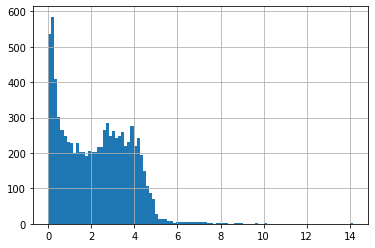

In [10]:
balance_min_ratio.hist(bins=100)

In [12]:
# fill data according to mean of balance/minimum_payments ratio
df['MINIMUM_PAYMENTS'].fillna(df['BALANCE']/2.18, inplace=True) 

In [16]:
df = df.dropna() # drop the only missing value in CREDIT LIMIT

## Dimention reduction

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
n_sample = df.shape[0]
n_feature = df.shape[1]

#scaled data
z_scaler = StandardScaler()
Mscale = z_scaler.fit_transform(df.values)


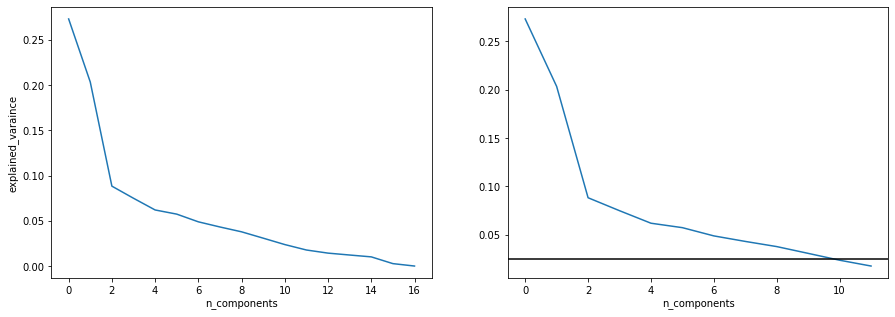

In [51]:
#fit pca and plot explained variance
n = n_feature # choose all feature first
pca = PCA(n_components = n)
pca_data = pca.fit(Mscale)
eigenvalue = pca.explained_variance_ratio_
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(range(len(eigenvalue)),eigenvalue)
plt.xlabel('n_components')
plt.ylabel('explained_varaince')

k = 12
ax2 = fig.add_subplot(122)
ax2.plot(range(k),eigenvalue[:k])
plt.xlabel('n_components')
plt.axhline(0.025,color='black') # cut-off 

In [53]:
# the first 10 components are most relevent.
#eigenvectors
df10 = pd.DataFrame(np.dot(Mscale,pca.components_[:10].T))
df10.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.684796,-1.070747,0.468887,0.685925,0.054381,0.075021,0.819422,-0.004923,0.119560,-0.077871
1,-1.132625,2.509035,0.607489,-0.109079,0.702513,-1.072051,-0.393917,0.197999,0.668938,-0.777107
2,0.968831,-0.383708,0.081027,1.254250,-2.159402,-0.401770,-1.521987,-0.285620,-0.848880,-0.002525
3,-0.876237,0.037476,1.445269,1.161245,0.323235,-0.100894,-0.273469,-0.579020,-0.113671,0.393417
4,-1.600780,-0.681803,0.337861,1.023551,-0.439101,0.069767,0.694072,0.263975,0.575726,-0.121344


## KMeans clustering using unreduced data

In [34]:
# check how many clusters to use

# criteria 1: Elbow method of SSE (sum of squared error). Choose the Elbow on lower values

from scipy.spatial import distance
K = range(2,20)
SSE = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(df)

    # calculate euclidean distance between each point and the centers
    d = distance.cdist(df,kmeanModel.cluster_centers_,metric='euclidean')
    # choose the nearest center and sum the cost
    score = np.sum(np.min(d,axis=1))/df.shape[0]

    print(score)
    SSE.append(score)


3911.913295309895
3694.047179227292
3605.022155751348
3287.116609657581
3197.765951459522
3093.239796269463
2934.306450801901
2823.0371821278345
2785.7219442109836
2719.1073821166183
2640.5862502771033
2541.7396999316557
2456.76395544164
2432.7399430472724
2381.865851036016
2372.0669322561553
2306.9762090119116
2293.0756580688267


In [24]:
# criteria 2: silhouette, check consistancy within clusters, choose local max
"""
The silhouette value is a measure of how similar an object is to 
its own cluster (cohesion) compared to other clusters (separation).
where a high value indicates that the object is well matched to 
its own cluster and poorly matched to neighboring clusters. 

"""
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = silhouette_score(df, kmeanModel.fit_predict(df))
    print(score)
    sil_scores.append(score)

0.5116772877723625
0.46633952814140417
0.46661355525755116
0.39796951701221694
0.3710595541816064
0.37016592935790915
0.3823370401080457
0.35277466609677943


In [39]:
# creteria 3: calinski_harabasz_score. Choose local max 
from sklearn.metrics import calinski_harabasz_score
"""
the calinski harabasz score also known as Variance Ratio Criterion.
score = (BGSS/(k-1))/(WGSS/(n-k))

where BGSS is the between cluster sum-of-squares, WGSS the within cluster sum-of-squares, 
k the number of clusters and n the number of samples. 
Evaluating the ratio for the different models with increasing k, 
the optimal clustering should be given by the first local maximum of the ratios

"""
chs_scores = []
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = calinski_harabasz_score(df, kmeanModel.fit_predict(df))
    print(score)
    chs_scores.append(score)


3646.305668639468
3079.8403653617497
2692.9989225140694
2599.289467322332
2564.121843185457
2541.8531461276575
2501.6771977560334
2421.1244274051046
2368.0308564916036
2312.0212936032226
2292.9560553655915
2236.331325071525
2175.3365932994307
2106.2838450507106
2074.6717131384758
2005.9780660624617
1967.7107233511026
1929.7980240998725


In [40]:
# creteria 4: davies_bouldin_score, choose the local min
from sklearn.metrics import davies_bouldin_score

"""
The score is defined as the average similarity measure of each cluster with its most similar cluster, 
where similarity is the ratio of within-cluster distances to between-cluster distances. 
Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.
"""

dbs_scores = []
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = davies_bouldin_score(df, kmeanModel.fit_predict(df))
    print(score)
    dbs_scores.append(score)


1.2416808085017925
1.1905325140131806
1.4026916439307113
1.2037433233338555
1.2013928926556876
1.1217043851236188
1.0986524783563676
1.1127331567811742
1.0449258179585466
1.048699887787563
1.0203883020585118
1.0576101103995936
1.1148148158711633
1.1276219776315435
1.1628005707334754
1.1318646489139446
1.1366585732291377
1.1336838930015904


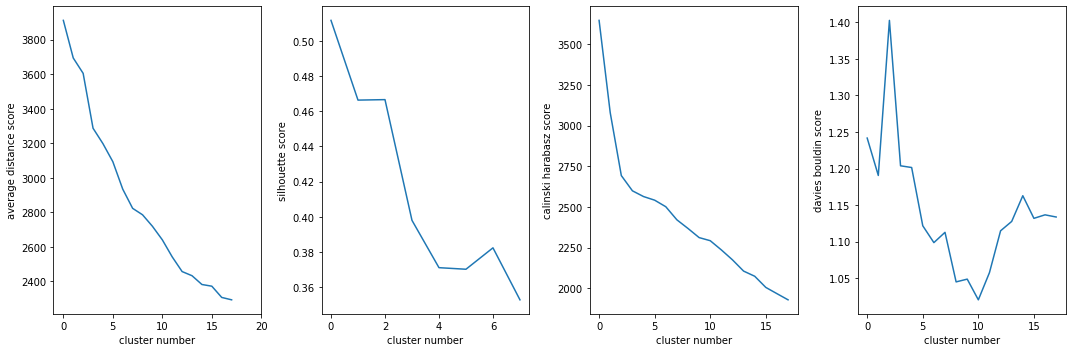

In [55]:
# plot model performance according to four types of scores 

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,4,1)
ax1.plot(SSE)
plt.xlabel('cluster number')
plt.ylabel('average distance score')
plt.xlim(-1,20)

ax2 = fig.add_subplot(1,4,2)
ax2.plot(sil_scores)
plt.xlabel('cluster number')
plt.ylabel('silhouette score')

ax3 = fig.add_subplot(1,4,3)
ax3.plot(chs_scores)
plt.xlabel('cluster number')
plt.ylabel('calinski harabasz score')

ax4 = fig.add_subplot(1,4,4)
ax4.plot(dbs_scores)
plt.xlabel('cluster number')
plt.ylabel('davies bouldin score')

plt.tight_layout()

## K-Means using PCA reduced data

In [57]:
K = range(2,10)

# creteria 1
SSE = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(df10)

    # calculate euclidean distance between each point and the centers
    d = distance.cdist(df10,kmeanModel.cluster_centers_,metric='euclidean')
    # choose the nearest center and sum the cost
    score = np.sum(np.min(d,axis=1))/df10.shape[0]

    print(score)
    SSE.append(score)
    
# creteria 2
sil_scores = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = silhouette_score(df10, kmeanModel.fit_predict(df))
    print(score)
    sil_scores.append(score)
    
# creteria 3
chs_scores = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = calinski_harabasz_score(df10, kmeanModel.fit_predict(df))
    print(score)
    chs_scores.append(score)
    
# creteria 4
dbs_scores = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    score = davies_bouldin_score(df10, kmeanModel.fit_predict(df))
    print(score)
    dbs_scores.append(score)

2.9853577264307236
2.8595967096400194
2.6447728298312163
2.542912975042283
2.380934127086048
2.3169829318970567
2.220670790804472
2.2033800153385115
0.2813042340306662
0.21019285190812917
0.13019277689897776
0.11221373354056274
0.13029149693406608
0.09115363295751151
0.08482529488390064
0.07219816512453313
1229.0358865515486
1034.4319938204844
837.7589709276875
838.9432407107785
881.0122494054484
767.1807809633988
771.4109648543825
721.9416959058632
2.2357756236246478
2.113774405176356
1.858485294070466
2.2268980802885063
2.2843453638938884
2.032278563611697
1.9163446651605405
2.1320036263915303


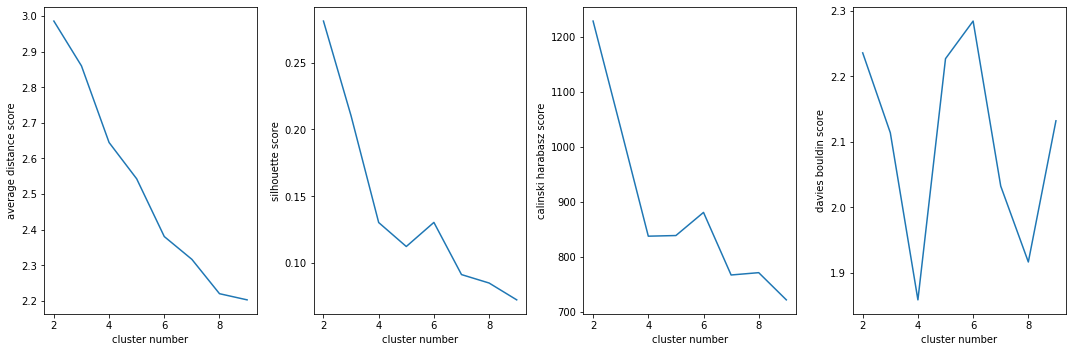

In [60]:
# plot performance according to four scores
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,4,1)
ax1.plot(K,SSE)
plt.xlabel('cluster number')
plt.ylabel('average distance score')


ax2 = fig.add_subplot(1,4,2)
ax2.plot(K,sil_scores)
plt.xlabel('cluster number')
plt.ylabel('silhouette score')

ax3 = fig.add_subplot(1,4,3)
ax3.plot(K,chs_scores)
plt.xlabel('cluster number')
plt.ylabel('calinski harabasz score')

ax4 = fig.add_subplot(1,4,4)
ax4.plot(K,dbs_scores)
plt.xlabel('cluster number')
plt.ylabel('davies bouldin score')

plt.tight_layout()

## First choice use 4 clusters according to 'Davies Bouldin score' using PCA reduced data 

In [61]:
kmeanModel = KMeans(n_clusters=4, random_state=0).fit(df10)

In [62]:
df['USER_TYPE'] = kmeanModel.labels_

In [63]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,USER_TYPE
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,764.527772,0.000000,12,1
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [79]:
colors = {1:'r',2:'b',3:'g',0:'black'}

df['color'] = df['USER_TYPE'].map(colors)

Text(0, 0.5, 'Second Dimension')

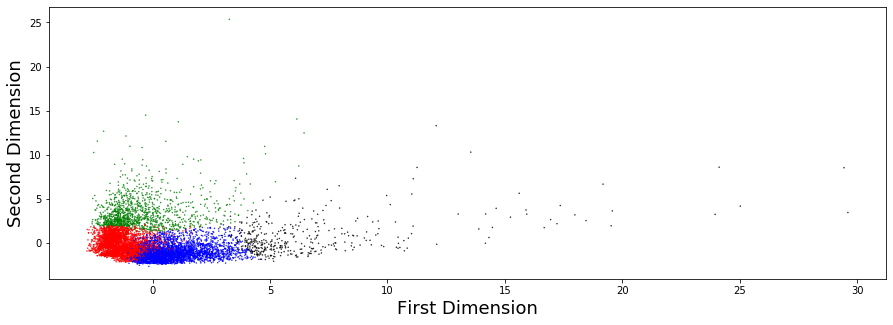

In [92]:
fig = plt.figure(figsize=(15,5))
plt.scatter(df10[0], df10[1],c=df['color'],s=0.2)
plt.xlabel('First Dimension',fontsize=18)
plt.ylabel('Second Dimension',fontsize=18)

## Explore 4 Clusters

In [99]:
cluster = [df.loc[df['USER_TYPE'] == i] for i in range(0,4)]

In [100]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'USER_TYPE', 'color', 'USER_TYPE_8', 'color8'],
      dtype='object')

In [101]:
columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

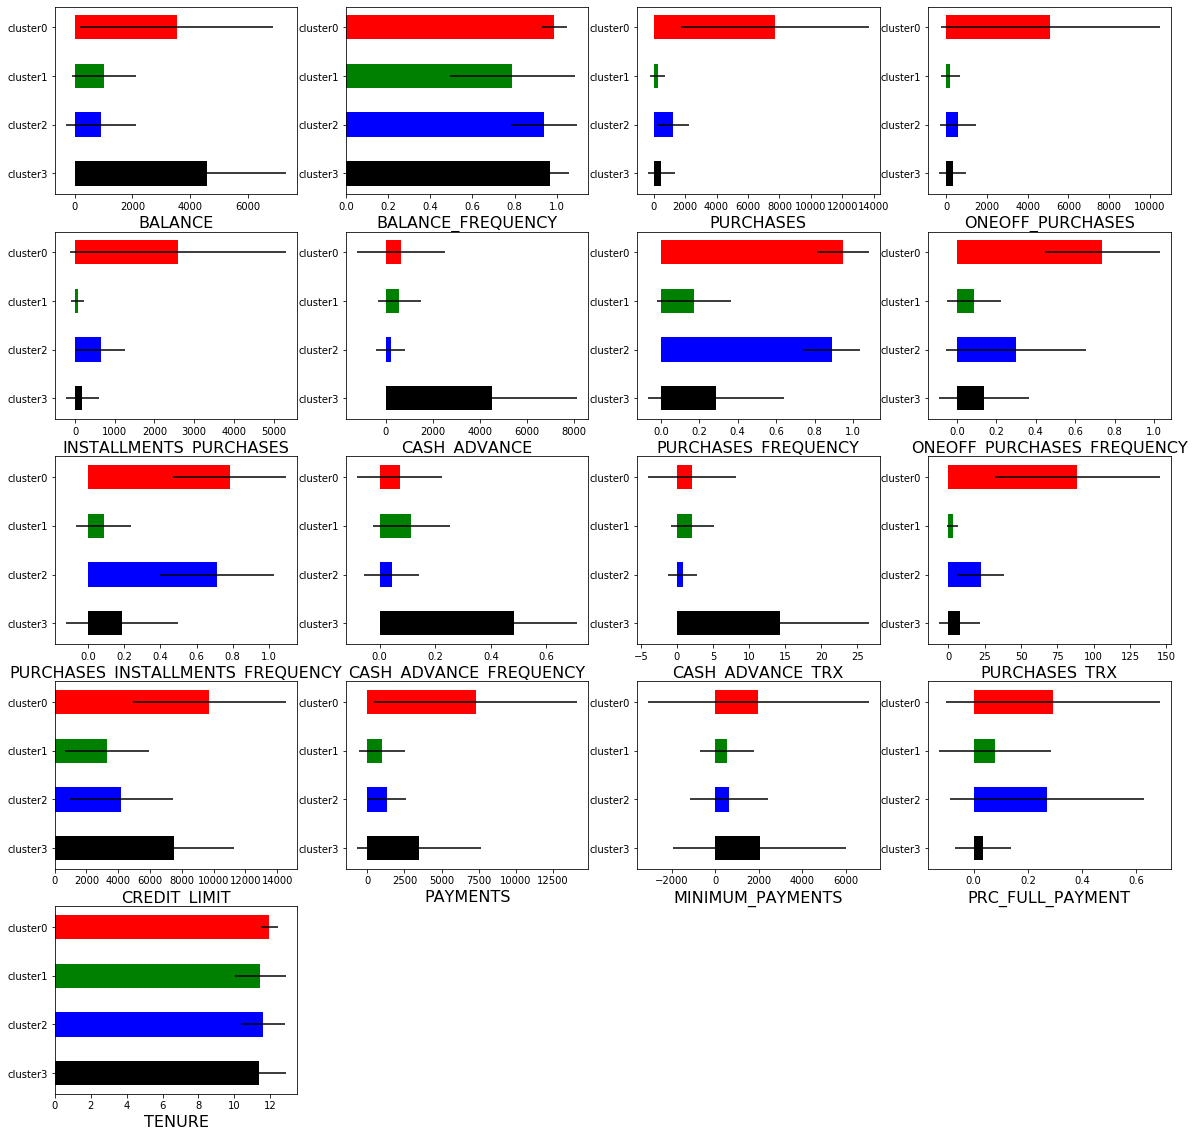

In [127]:
fig = plt.figure(figsize=(20,20))
barwidth = 0.5
y_pos = [1,2,3,4]
c = ['r','g','b','k']
for i, col in enumerate(columns):
    ax = fig.add_subplot(5,4,i+1)
    ax.barh(y_pos, height=barwidth, color=c,\
            width=[cluster[j][col].mean() for j in range(0,4)],
           xerr = [cluster[j][col].std() for j in range(0,4)])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(('cluster0','cluster1','cluster2','cluster3'))
    ax.invert_yaxis()
    ax.set_xlabel(col,fontsize=16)
        

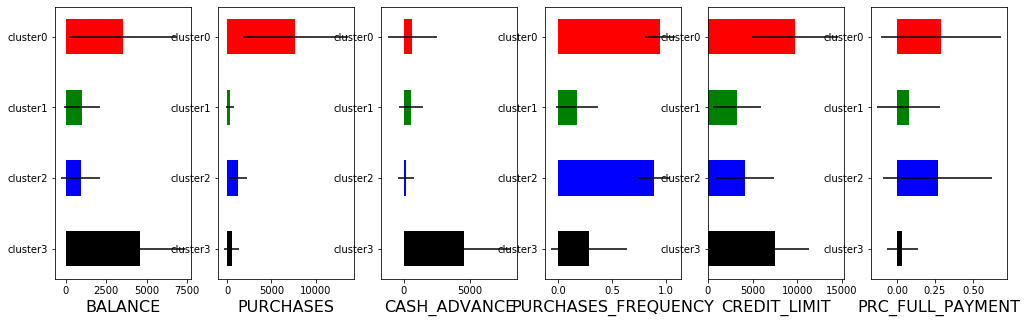

In [128]:
# differences we could see from the four clusters

dif_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT','PRC_FULL_PAYMENT']

# re plot all figures in dif_cols
fig = plt.figure(figsize=(20,5))
for i, col in enumerate(dif_cols):
    ax = fig.add_subplot(1,len(dif_cols)+1,i+1)
    ax.barh(y_pos, height=barwidth, color=c,\
            width=[cluster[j][col].mean() for j in range(0,4)],
           xerr = [cluster[j][col].std() for j in range(0,4)])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(('cluster0','cluster1','cluster2','cluster3'))
    ax.invert_yaxis()
    ax.set_xlabel(col,fontsize=16)
        

In [198]:
# for each feature, assing 1(high) and 0(low) for each clusters
c = [[] for i in range(4)]
c[0] = '110111' # code = [1,1]
c[1] = '000000' # code = [0,0]
c[2] = '000101' # code = [0,1]
c[3] = '101010' # code = [1,0]

In [203]:
# the distinctive three features to distinguish the four clusters:
idx = []
for i in range(len(c0)-1):
    for j in range(i+1,len(c0)):
        idx.append([i,j])

for n in idx:
    comb = [c[i][n[0]]+c[i][n[1]] for i in range(4)]
    if len(set(comb)) == len(comb):
        print(n)
        print(comb)


[0, 3]
['11', '00', '01', '10']
[0, 5]
['11', '00', '01', '10']
[3, 4]
['11', '00', '10', '01']
[4, 5]
['11', '00', '01', '10']


In [222]:
# the distinctive four features to distinguish the four clusters:

for col_index in [[0,3],[0,5],[3,4],[4,5]]:
    print('feature1:{}'.format(columns[col_index[0]]),'and', 'feature2:{}'.format(columns[col_index[1]]))



feature1:BALANCE and feature2:ONEOFF_PURCHASES
feature1:BALANCE and feature2:CASH_ADVANCE
feature1:ONEOFF_PURCHASES and feature2:INSTALLMENTS_PURCHASES
feature1:INSTALLMENTS_PURCHASES and feature2:CASH_ADVANCE


### The users are segmented into 4 groups:

cluster0: Frequent Buyer and High Balance, With highest Credit Limit

cluster1: Infrequent Buyer and Low Balance, With Lowest Credit Limit

cluster2: Frequent Buyer and Low Balance, Due to low Credit Limit

cluster3: Infrequent Buyer and High Balance, Cash_advancer. Credit Limit ranked second

### Suggestions:

For frequent buyers, cash bonus associated with purchase would be a good incentive way.

For cluster3 users, offer cash advance would be more incentive

For cluster2 users, we could either increase credit limit or offer new card options to them to encourage more purchases.

## Second choice: 6 clusters according to 'Silhoutte score' and 'calinski harabasz score'

In [205]:
kmean6 = KMeans(n_clusters=6, random_state=0).fit(df10)
df['USER_TYPE_6'] = kmean6.labels_
colors = {0:'r', 1:'k',2:'b',3:'g',4:'c',5:'m'}
df['color6'] = df['USER_TYPE_6'].map(colors)

Text(0, 0.5, 'Second Dimension')

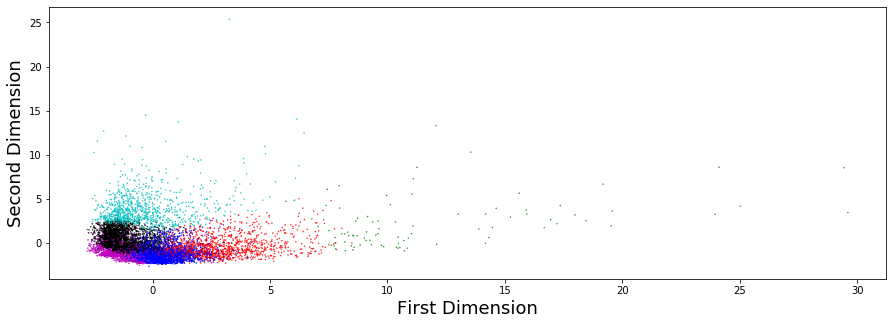

In [206]:
fig = plt.figure(figsize=(15,5))
plt.scatter(df10[0], df10[1],c=df['color6'],s=0.2)
plt.xlabel('First Dimension',fontsize=18)
plt.ylabel('Second Dimension',fontsize=18)

In [207]:
df.to_csv('labeled_df.csv')

In [209]:
cluster6 = [df.loc[df['USER_TYPE_6'] == i] for i in range(0,6)]

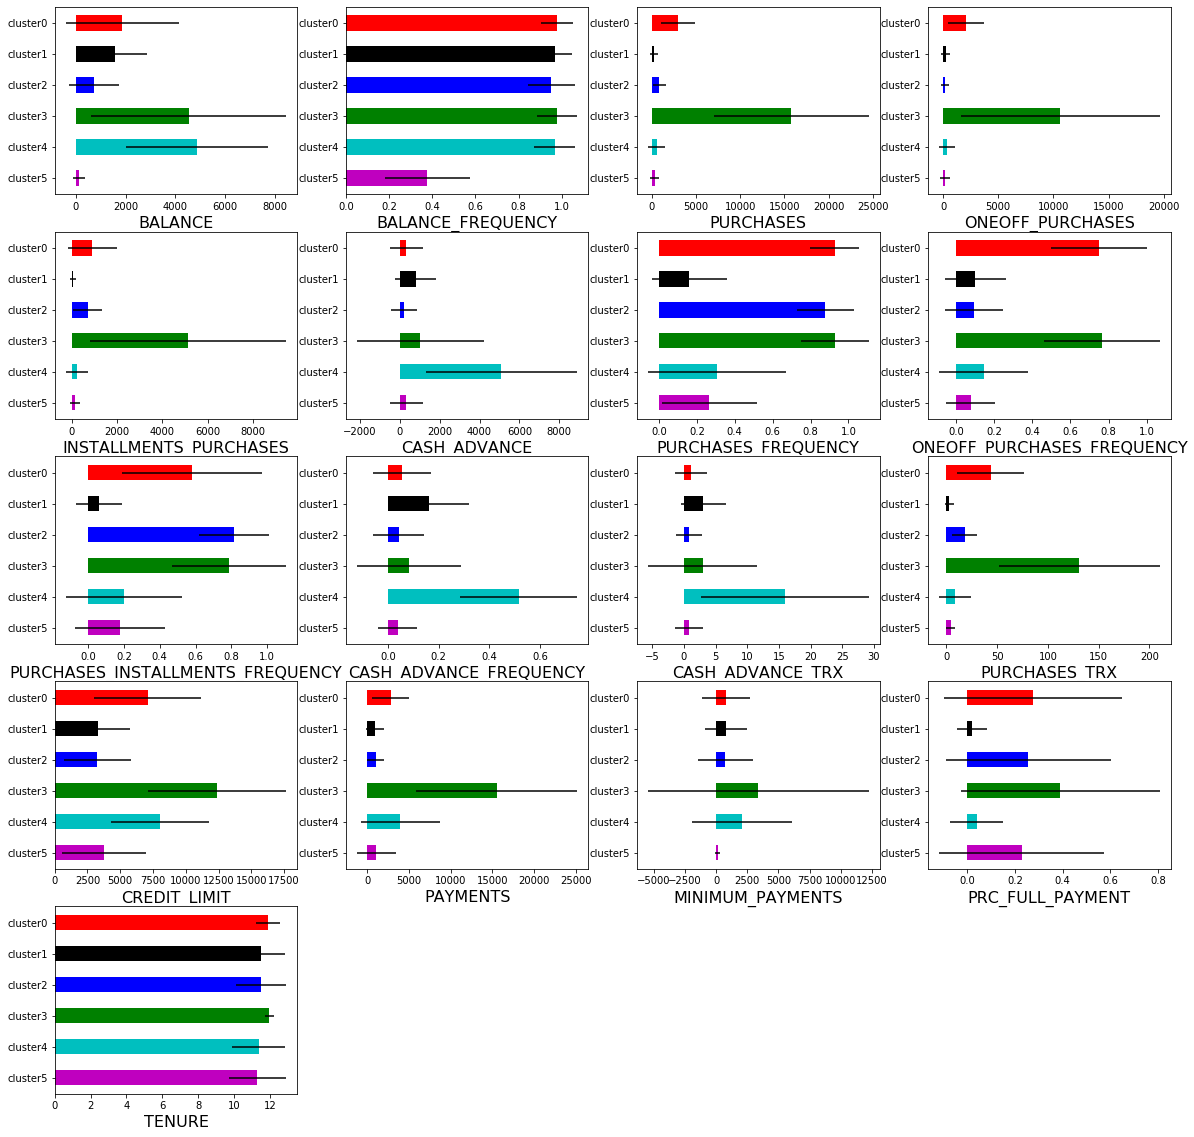

In [210]:
fig = plt.figure(figsize=(20,20))
barwidth = 0.5
y_pos = np.arange(0,6)
c = ['r','k','b','g','c','m']
for i, col in enumerate(columns):
    ax = fig.add_subplot(5,4,i+1)
    ax.barh(y_pos, height=barwidth, color=c,\
            width=[cluster6[j][col].mean() for j in range(0,6)],
           xerr = [cluster6[j][col].std() for j in range(0,6)])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(['cluster' + str(i) for i in range(0,6)])
    ax.invert_yaxis()
    ax.set_xlabel(col,fontsize=16)

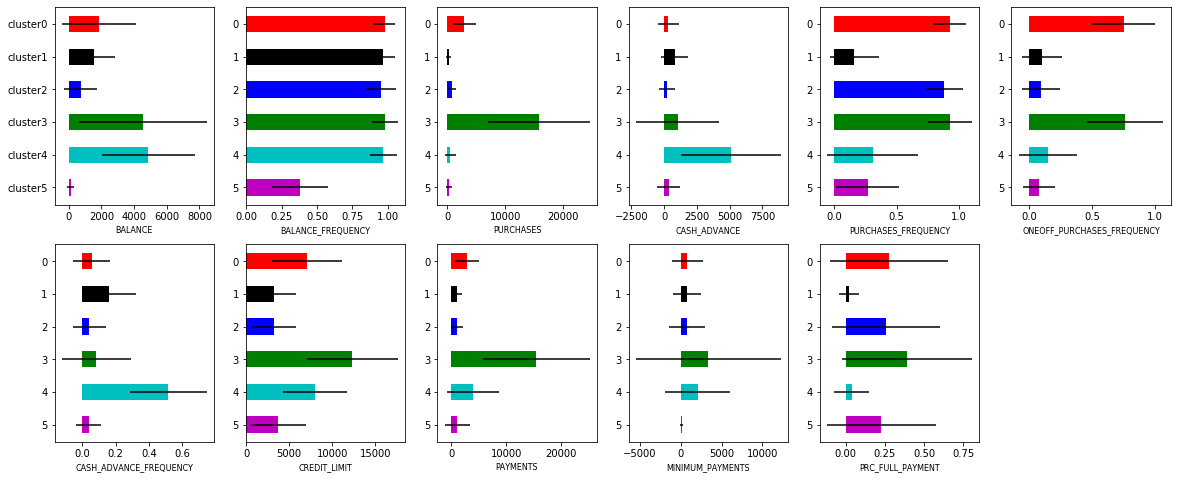

In [219]:
dif6_cols = ['BALANCE', 'BALANCE_FREQUENCY','PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', \
             'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT','PAYMENTS',\
             'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
             
y_pos = np.arange(0,6)
# re plot all figures in dif_cols
fig = plt.figure(figsize=(20,8))
for i, col in enumerate(dif6_cols):
    ax = fig.add_subplot(2,int(len(dif6_cols)/2)+1,i+1)
    ax.barh(y_pos, height=barwidth, color=c,\
            width=[cluster6[j][col].mean() for j in range(0,6)],
           xerr = [cluster6[j][col].std() for j in range(0,6)])
    if i == 0:
        ax.set_yticks(y_pos)
        ax.set_yticklabels(['cluster' + str(i) for i in range(0,6)])
    
    ax.invert_yaxis()
    ax.set_xlabel(col,fontsize=8)

In [220]:
# for each feature, assing 1(high) and 0(low) for each clusters
f = [[] for i in range(len(dif6_cols))]
f[0] = '000110'  
f[1] = '000001'  
f[2] = '000100'  
f[3] = '000010' 
f[4] = '101100' 
f[5] = '100100'
f[6] = '010010'
f[7] = '100110'
f[8] = '000100'
f[9] = '000110'
f[10] = '101101'

In [224]:
c = []
for n in range(6):
    code = ''
    for i in range(len(f)):
        code += f[i][n]
    c.append(code)
c[0]    

'00001101001'

In [231]:
c

['00001101001',
 '00000010000',
 '00001000001',
 '10101101111',
 '10010011010',
 '01000000001']

In [226]:
# the distinctive three features to distinguish the four clusters:
idx3 = []
for i in range(len(c0)-2):
    for j in range(i+1,len(c0)-1):
        for k in range(j+1,len(c0)):
            idx.append([i,j,k])

for n in idx3:
    comb = [c[i][n[0]]+c[i][n[1]]+c[i][n[2]] for i in range(6)]
    if len(set(comb)) == len(comb):
        print(n)
        print(comb)

In [227]:
# three features is not enough to address difference, use four features
idx4 = []
for i in range(len(c0)-3):
    for j in range(i+1,len(c0)-2):
        for k in range(j+1,len(c0)-1):
            for m in range(k+1,len(c0)):
                idx4.append([i,j,k,m])

for n in idx4:
    comb = [c[i][n[0]]+c[i][n[1]]+c[i][n[2]]+c[i][n[3]] for i in range(6)]
    if len(set(comb)) == len(comb):
        print(n)
        print(comb)


[0, 1, 4, 5]
['0011', '0000', '0010', '1011', '1000', '0100']


In [230]:
# the distinctive four features to distinguish the four clusters:

for feature in [0,1,4,5]:
    print('feature{}:{}'.format(feature, columns[feature]))

feature0:BALANCE
feature1:BALANCE_FREQUENCY
feature4:INSTALLMENTS_PURCHASES
feature5:CASH_ADVANCE


### The features that distinguish the users are similar with 4 clusters: Balance, Purchase and cash_advance.

### The users are segmented into 6 groups:

cluster0: [0011]

Low Balance and Infrequent Buyer, who only take Installment loan and Cash advance.

cluster1: [0000]

Infrequent Buyer and Low Balance, also not intereasted in Installment loan or Cash advance. Very inactive user.

cluster2: [0010]

Low Balance and Infrequent Buyer, who take Installment loan but not Cash advance.

cluster3: [1011]

High Balance and Infrequent Buyer, who only take Installment loan and Cash advance.

cluster4: [1000]

High Balance and Infrequent Buyer, who don't take Installment loan or Cash advance. 

cluster5: [0100]

Low Balance and Frequent Buyer, who don't take Installment loan or Cash advance. 


### Suggestions:

For frequent buyers (cluster5), cash bonus associated with purchase would be a good incentive way.

For cash advance users (cluster0,3), offer cash advance would be more incentive.

For Installment load users (cluster0,2,3), offer low interests loan would be attractive.

For cluster4 users, we could either increase credit limit or offer new card options to them to encourage more purchases.

# Visualization by TSNE


In [246]:

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.patheffects as PathEffects

In [258]:
project = TSNE(random_state=20200224).fit_transform(df10)

In [262]:
def tsne_scatter(x, colors, n):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", n))
    
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(n):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


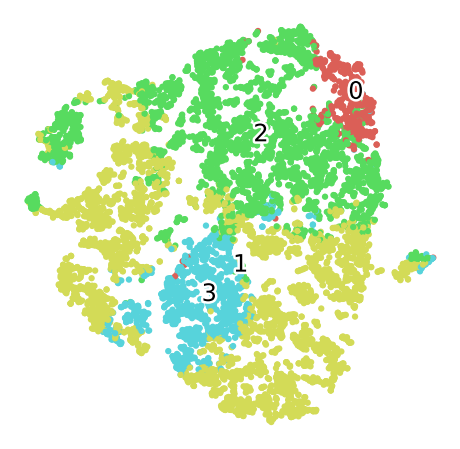

In [259]:
_ = tsne_scatter(project, df['USER_TYPE'], 4)

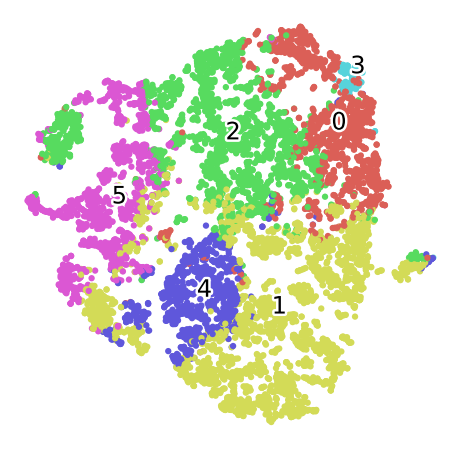

In [260]:
_ = tsne_scatter(project, df['USER_TYPE_6'], 6)